# **Modulo 4**
# **Arboles y Bosques Aleatorios**

## Clasificación

La clasificación se utiliza para asignar elementos a categorías o clases predefinidas basadas en características o atributos específicos, como si un correo electrónico es spam o no, o diagnosticar si un paciente tiene cáncer o no.

El objetivo es asignar cada observación a una clase o categoría específica.


Algunos algoritmos populares de clasificación son:

- Árboles de decisión
- Naive Bayes
- KNN
- SVM
- Redes neuronales

# Árboles de decisión

Los árboles de decisión (Decision tree) son un tipo de algoritmo de aprendizaje supervisado que se puede usar tanto para problemas de regresión como clasificación.

Funcionan construyendo un árbol de decisión a partir de los datos de entrenamiento que hace predicciones ramificándose como un árbol.

Empiezan desde la raíz y se dividen en nodos internos basados en las características más relevantes, y terminan en nodos hoja que contienen la predicción.

Por ejemplo, un árbol de decisión para diagnosticar una enfermedad podría empezar preguntando por los síntomas más relevantes, y luego seguir ramificándose basado en las respuestas hasta llegar a una conclusión diagnóstica.

Los árboles son fáciles de entender e interpretar comparados con modelos de caja negra. Capturan interacciones complejas y no requieren escalado de variables.

Sin embargo, son propensos a sobreajuste y normalmente se necesitan métodos de ensemble como random forest para mejorar el rendimiento.


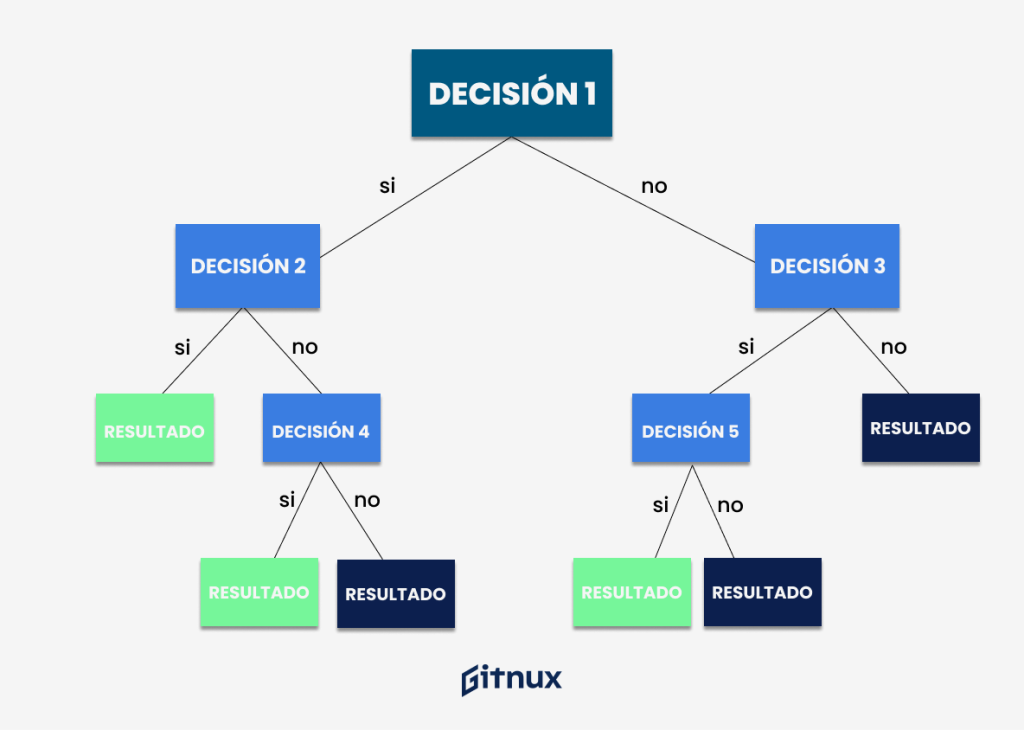

**Explicación de las Etiquetas en los Nodos del Árbol de Decisión:**

Cuando visualizamos el árbol de decisión, podemos encontrar algunas etiquetas en los nodos que nos proporcionan información relevante sobre el proceso de clasificación:

1. **Gini impurity (Gini):** Es una medida de la impureza de un nodo. Mientras más cerca esté de cero (0), más puro es el nodo y contiene principalmente ejemplos de una sola clase. Si Gini es cercano a uno (1), el nodo contiene una mezcla de diferentes clases.

2. **Samples:** Indica el número total de ejemplos en el nodo que se están evaluando en ese paso del árbol.

3. **Value:** Muestra la distribución de las clases en el nodo. En el primer ejemplo, tenemos dos clases "Benigno" y "Malingno", el valor [B, M] indicaría que hay "B" ejemplos de la clase "Benigno" y "M" ejemplos de la clase "Malingno" en ese nodo.

4. **Class:** Cuando un nodo es puramente de una sola clase, se muestra el nombre de la clase. Por ejemplo, si el nodo contiene solo ejemplos de "Malingno", entonces la etiqueta sería "M".

Es importante tener en cuenta que a medida que descendemos en el árbol, los nodos que están más cerca de la raíz son los que contienen características más generales y los que están más cerca de las hojas son los que contienen características más específicas para clasificar correctamente los ejemplos. El árbol de decisión utiliza estas etiquetas para tomar decisiones y clasificar nuevas imágenes según las características que encuentra en cada nodo.

# 1) Clasificacion
## Ejemplo 1.1:

https://data.world/health/breast-cancer-wisconsin
https://archive.ics.uci.edu/dataset/16/breast+cancer+wisconsin+prognostic

##Dataset "Breast Cancer Wisconsin (Diagnostic)":
Disponible en el repositorio de aprendizaje automático de la UCI (UCI Machine Learning Repository). Este conjunto de datos es ampliamente utilizado en la comunidad de aprendizaje automático y es un recurso común para la clasificación de cáncer de mama.

El conjunto de datos contiene características calculadas a partir de imágenes digitalizadas de aspiraciones con aguja fina (FNA) de una masa mamaria. Estas características describen varios aspectos de los núcleos celulares presentes en las imágenes.

A continuación, te proporciono una descripción general de las columnas presentes en el conjunto de datos:

ID: Número de identificación del paciente.

- Diagnóstico (Diagnosis): Variable objetivo que indica si la muestra es benigna (B) o maligna (M).

10 características de valor real (real-valued features) que describen diferentes propiedades de los núcleos celulares en las imágenes FNA. Estas características incluyen:
- Radio (radius)
- Textura (texture)
- Perímetro (perimeter)
- Área (area)
- Suavidad (smoothness)
- Compacidad (compactness)
- Concavidad (concavity)
- Puntos cóncavos (concave points)
- Simetría (symmetry)
- Dimensión fractal (fractal dimension)




El objetivo de este análisis es desarrollar un modelo de clasificación utilizando árboles de decisión que pueda ayudar a determinar si un tumor es benigno (B) o maligno (M) en función de las características del núcleo celular. Utilizaremos variables como el radio medio del tumor, la textura media, el perímetro medio, el área media, entre otras, para realizar estas predicciones.

In [ ]:
# Cargando modulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.metrics import accuracy_score
from IPython.display import Image
import pydotplus
from io import StringIO
from sklearn.impute import SimpleImputer

# Lectura y visualización de información general de dataset

In [ ]:
# Cargar el conjunto de datos Breast Cancer Wisconsin
url="https://raw.githubusercontent.com/Rafael-Ernesto-Perez/machine_learning/master/UNNE/2023/datasets/breast-cancer-wisconsin-data_data.csv"
data = pd.read_csv(url)

# Mostrar información general del conjunto de datos
print("Información general del conjunto de datos:")
print(data.info())

Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null

Para ver las dimesiones del dataset podemos utilizar el comando "shape". Este nos devolvera el valor de filas y columnas presentes en nuestro dataset de análisis

In [ ]:
data.shape

(569, 33)

Podemos leer algunas columnas e interpretar los datos presentes en el dataset

In [ ]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


## Clasificación con árbol de decisión

# Preparación de datos para entrenamiento

In [ ]:
# Definir la variable objetivo y las características (variables predictoras)
y = data["diagnosis"]
X = data.drop(["diagnosis", "id", "Unnamed: 32"], axis=1)  # Eliminar columnas no deseadas

# Imputar los valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Se han eliminado los valores faltantes (NaN)

In [ ]:
# Table con características
X.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Variable objetivo
y.head(5)

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

## Separación del dataset en sets de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=27)

## Entrenamiento del árbol de decisión

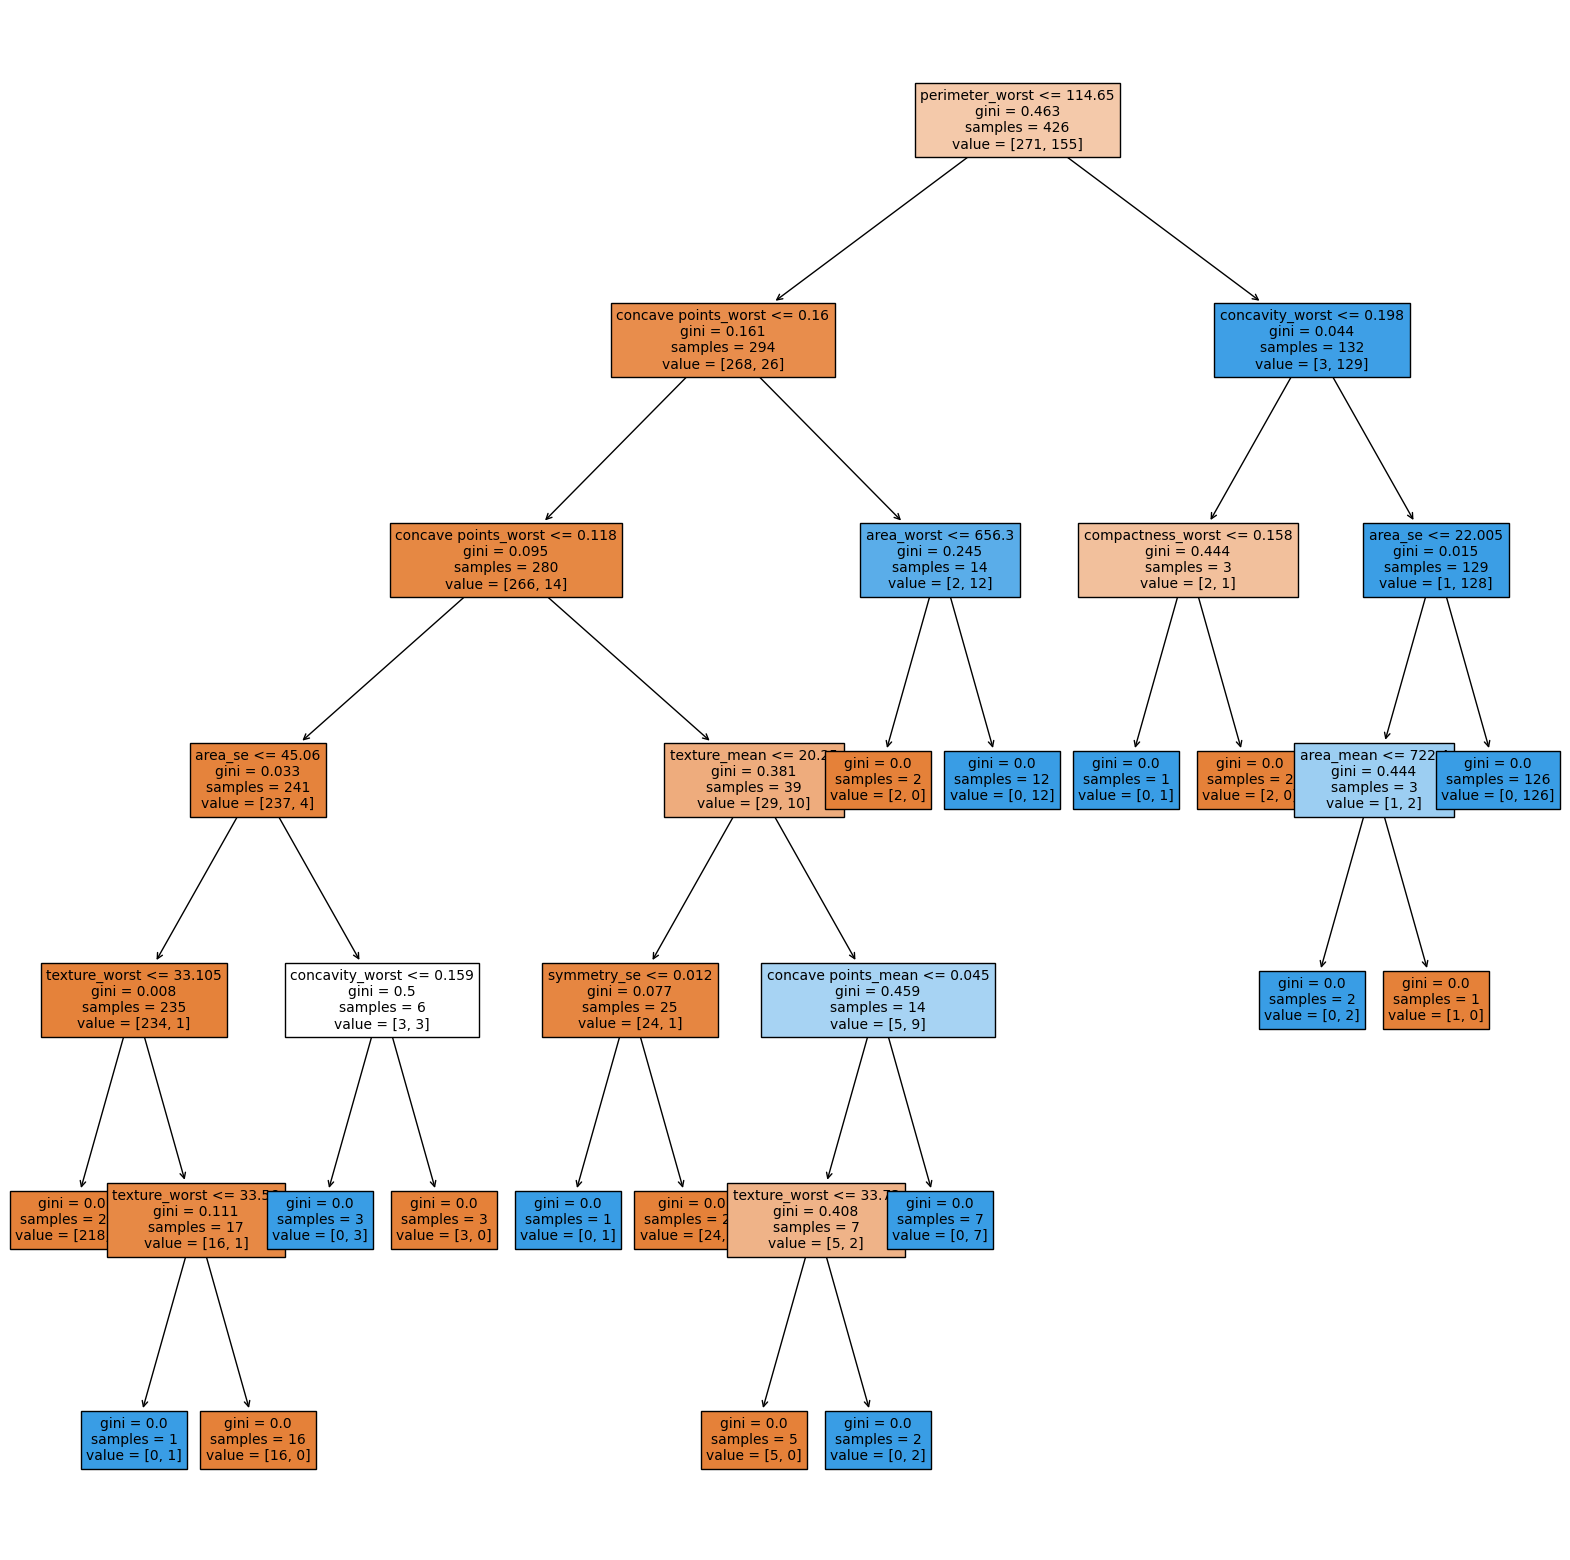

Aciertos: 0.8811188811188811
Aciertos %: 88.11188811188812


In [ ]:
# Crear el clasificador del árbol de decisión
arbol_c = DecisionTreeClassifier()
arbol_c.fit(X_train, y_train)
# Mostrar el árbol de clasificación
plt.figure(figsize=(20, 20))
plot_tree(arbol_c, filled=True, feature_names=X.columns, fontsize=10)
plt.show()

# Realizar predicciones en el conjunto de prueba
predichos = arbol_c.predict(X_test)

# Calcular la tasa de aciertos
tasa_aciertos = accuracy_score(y_test, predichos)
print("Aciertos:", tasa_aciertos)
print("Aciertos %:", tasa_aciertos*100)

In [ ]:
# Crear un DataFrame para mostrar la comparación entre los valores reales y predichos
comparacion_df = pd.DataFrame({'Valor Real': y_test.values[:10], 'Valor Predicho': predichos[:10]})

print("\nTabla de comparación entre Valor Real y Valor Predicho:")
print(comparacion_df)


Tabla de comparación entre Valor Real y Valor Predicho:
  Valor Real Valor Predicho
0          B              M
1          B              B
2          M              M
3          M              M
4          B              B
5          B              B
6          M              M
7          B              B
8          B              M
9          M              M


## **Ajuste de Hiperparámetros**
## El ajuste de hiperparámetros es una etapa crucial en el proceso de entrenamiento de modelos de aprendizaje automático. Los hiperparámetros son valores que se configuran antes del entrenamiento y afectan el rendimiento del modelo.

## Modificando la profundidad del árbol (max_depth)

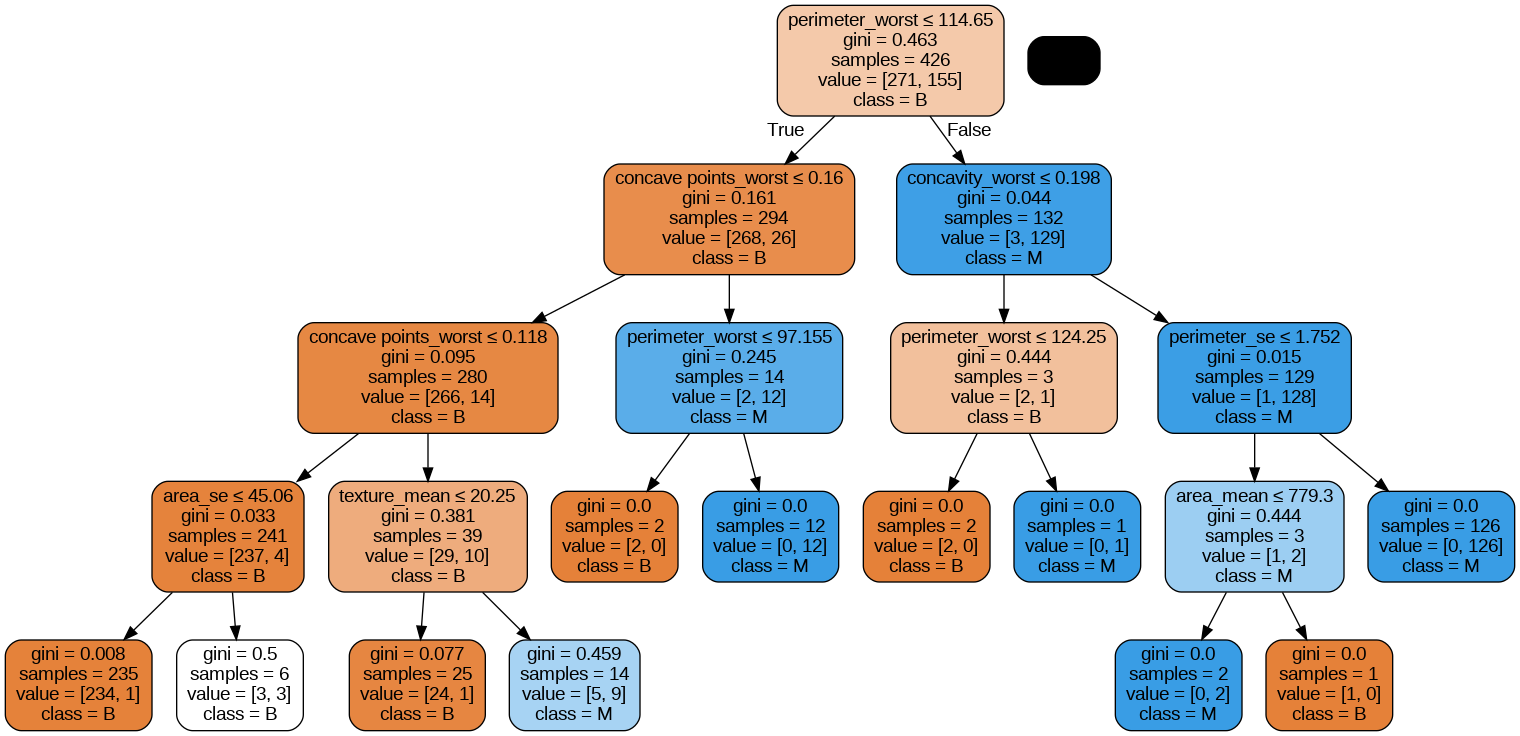

In [ ]:
# Crear un árbol de clasificación con una profundidad máxima de 3 para visualización
arbol_c2 = DecisionTreeClassifier(max_depth=4) # Modificable
arbol_c2.fit(X_train, y_train)

predichos2 = arbol_c2.predict(X_test)

# Visualizar el árbol de clasificación más legible
dot_data = StringIO()
export_graphviz(arbol_c2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=['B', 'M'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# Calcular la tasa de aciertos del árbol podado en el conjunto de prueba
tasa_acierto2 = arbol_c2.score(X_test, y_test)
print("Tasa de acierto del árbol con profundidad máxima 3:", tasa_acierto2)
print("Tasa de acierto del árbol con profundidad máxima 3 %:", tasa_acierto2*100)

Tasa de acierto del árbol con profundidad máxima 3: 0.9090909090909091
Tasa de acierto del árbol con profundidad máxima 3 %: 90.9090909090909


In [ ]:
# Crear un DataFrame para mostrar la comparación entre los valores reales y predichos
comparacion_df = pd.DataFrame({'Valor Real': y_test.values[:10], 'Valor Predicho': predichos2[:10]})

print("\nTabla de comparación entre Valor Real y Valor Predicho:")
print(comparacion_df)


Tabla de comparación entre Valor Real y Valor Predicho:
  Valor Real Valor Predicho
0          B              B
1          B              B
2          M              M
3          M              M
4          B              B
5          B              B
6          M              M
7          B              B
8          B              B
9          M              M


### <font color='red'> PRACTICA 1 </font>

# Modificar el valor de profundidad del arbol (max_depth).


##    ¿Se modifican los gráficos de los arboles?
##    ¿Mejoran los resultados?





## Mejorando resultados mediante modificación de poda

El CCP alpha (Cost Complexity Pruning alpha) es un parámetro utilizado en la poda (pruning) basada en la complejidad de costo en los árboles de decisión. La poda es una técnica utilizada para reducir la complejidad y el sobreajuste de los árboles de decisión al eliminar las ramas que no aportan un beneficio significativo en términos de precisión de predicción.

El CCP alpha controla el equilibrio entre el ajuste del árbol a los datos de entrenamiento y la simplicidad del árbol resultante. Un valor mayor de CCP alpha conduce a una poda más agresiva, lo que significa que se eliminarán más nodos y ramas del árbol. Por otro lado, un valor menor de CCP alpha conservará más nodos y ramas, lo que resultará en un árbol más complejo y ajustado a los datos de entrenamiento.

En general, el CCP alpha suele estar en el rango de 0 a 1.

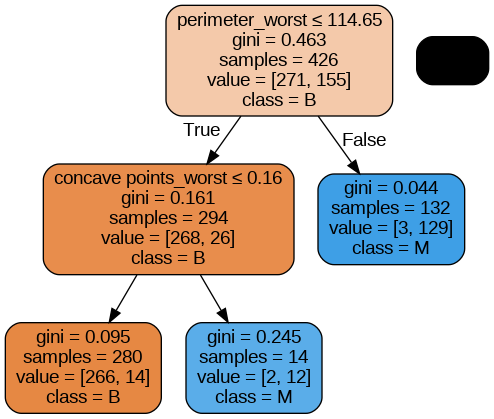

In [ ]:
arbol_c3 = DecisionTreeClassifier(ccp_alpha=0.02) # Modificar con un valor entre 0 y 1
arbol_c3.fit(X_train, y_train)

predichos3 = arbol_c3.predict(X_test)

# Visualizar el árbol de clasificación podado
dot_data = StringIO()
export_graphviz(arbol_c3, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=['B', 'M'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# Calcular la tasa de aciertos del árbol podado en el conjunto de prueba
tasa_acierto3 = arbol_c3.score(X_test, y_test)
print("Tasa de acierto del árbol podado:", tasa_acierto3)
print("Tasa de acierto del árbol podado:", tasa_acierto3*100)

Tasa de acierto del árbol podado: 0.9230769230769231
Tasa de acierto del árbol podado: 92.3076923076923


In [ ]:
# Crear un DataFrame para mostrar la comparación entre los valores reales y predichos
comparacion_df = pd.DataFrame({'Valor Real': y_test.values[:10], 'Valor Predicho': predichos3[:10]})

print("\nTabla de comparación entre Valor Real y Valor Predicho:")
print(comparacion_df)


Tabla de comparación entre Valor Real y Valor Predicho:
  Valor Real Valor Predicho
0          B              B
1          B              B
2          M              M
3          M              M
4          B              B
5          B              B
6          M              M
7          B              B
8          B              B
9          M              M


### <font color='red'> PRACTICA 2 </font>
# Modifique el valor de ccp_alpha y anote tres pares de datos. tasa de aciertos y valor de ccp_alpha.
# ¿Se observan cambios en los arboles de desición?
# ¿Que se puede interpretar a partir de la modificación de este hiperparámetro?

## **Optimizando hipermarámetros**




optimal alpha: 0.008048289738430586


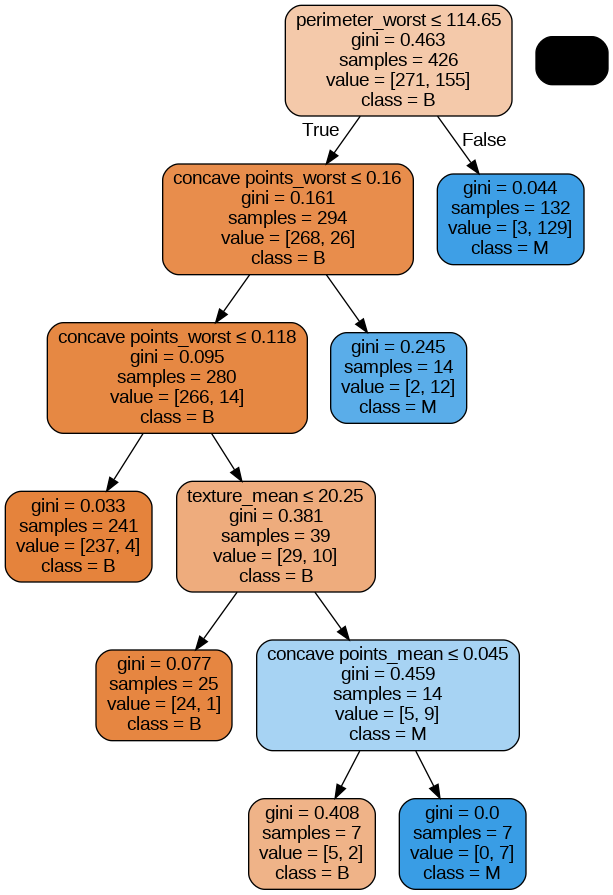

In [ ]:

# Realizar la poda del árbol utilizando el parámetro ccp_alpha
alfas = arbol_c.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = alfas.ccp_alphas

# Construir todos los árboles posibles con los diferentes valores de ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Calcular las tasas de aciertos y el número de nodos para cada árbol
test_scores = [clf.score(X_test, y_test) for clf in clfs]
node_counts = [clf.tree_.node_count for clf in clfs]

# Encontrar el valor ccp_alpha que maximiza la tasa de aciertos
optimal_alpha = ccp_alphas[np.argmax(test_scores)]

# Crear un árbol de clasificación con el valor óptimo de ccp_alpha
arbol_c4 = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
arbol_c4.fit(X_train, y_train)

predichos3 = arbol_c4.predict(X_test)

print("optimal alpha:", optimal_alpha)

# Visualizar el árbol de clasificación podado
dot_data = StringIO()
export_graphviz(arbol_c4, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=['B', 'M'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())






In [ ]:
# Calcular la tasa de aciertos del árbol podado en el conjunto de prueba
tasa_acierto4 = arbol_c4.score(X_test, y_test)
print("Tasa de acierto del árbol podado:", tasa_acierto4)
print("Tasa de acierto del árbol podado:", tasa_acierto4*100)

Tasa de acierto del árbol podado: 0.9370629370629371
Tasa de acierto del árbol podado: 93.7062937062937


### <font color='red'> PRACTICA 3 </font>
#Modifique el set de datos para trabajar con 70 % del total para entrenamiento.

#¿Que pasaría si acompañamos al ccp_alpha con un valor de profundidad? ¿Mejoran los resultados?


## **Modificación de Criterion**

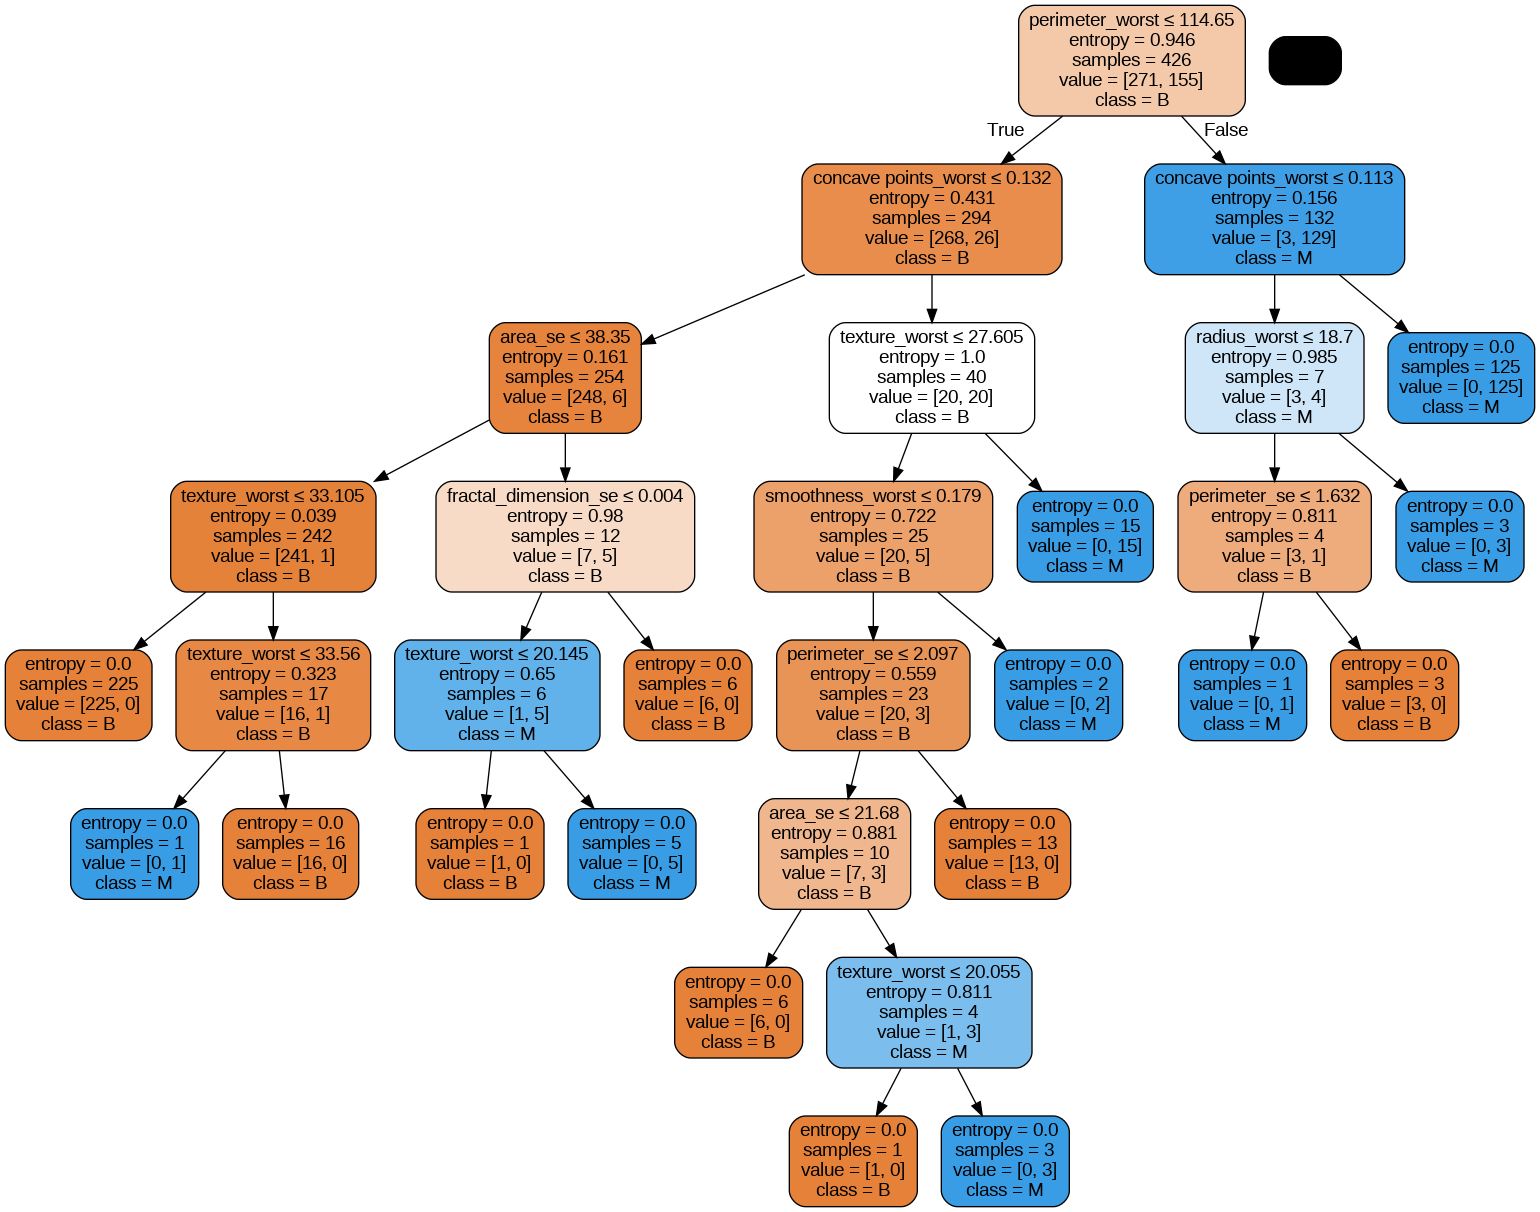

In [ ]:
# Crear un árbol de clasificación con una profundidad máxima de 3 para visualización
arbol_c5 = DecisionTreeClassifier(criterion="entropy") # Modificable
arbol_c5.fit(X_train, y_train)

predichos5 = arbol_c5.predict(X_test)

# Visualizar el árbol de clasificación más legible
dot_data = StringIO()
export_graphviz(arbol_c5, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X.columns, class_names=['B', 'M'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
# Calcular la tasa de aciertos del árbol podado en el conjunto de prueba
tasa_acierto5 = arbol_c5.score(X_test, y_test)
print("Tasa de acierto del árbol podado:", tasa_acierto5)
print("Tasa de acierto del árbol podado:", tasa_acierto5*100)

Tasa de acierto del árbol podado: 0.916083916083916
Tasa de acierto del árbol podado: 91.6083916083916


In [ ]:
# Crear un DataFrame para mostrar la comparación entre los valores reales y predichos
comparacion_df = pd.DataFrame({'Valor Real': y_test.values[:10], 'Valor Predicho': predichos5[:10]})

print("\nTabla de comparación entre Valor Real y Valor Predicho:")
print(comparacion_df)


Tabla de comparación entre Valor Real y Valor Predicho:
  Valor Real Valor Predicho
0          B              B
1          B              B
2          M              M
3          M              M
4          B              B
5          B              B
6          M              M
7          B              B
8          B              B
9          M              M


# ¿Cambian los resultados si utilizamos "entropy"? ¿Qué tiene en cuenta entropy comparado con gini ?

# **Tarea**

# Crear un árbol de clasificación donde utilice los hiperparámetros utilizados en los ejemplos, intente lograr el mejor valor de accuracy posible mediante la combinación de los mismos.

# **Regresion**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from IPython.display import Image
import pydotplus
from io import StringIO

# Cargar el conjunto de datos Breast Cancer Wisconsin
url = "https://raw.githubusercontent.com/Rafael-Ernesto-Perez/machine_learning/master/UNNE/2023/datasets/breast-cancer-wisconsin-data_data.csv"
data = pd.read_csv(url)

# Mostrar información general del conjunto de datos
print("Información general del conjunto de datos:")
print(data.info())

# Utilizar "perimeter_mean" como variable objetivo para la regresión
y = data["perimeter_mean"]
X = data.drop(["diagnosis", "id", "Unnamed: 32", "perimeter_mean"], axis=1)  # Eliminar columnas no deseadas

# Imputar los valores faltantes con la media de cada columna
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Separar el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=27)

# Crear el regresor del árbol de regresión
arbol_regresion = DecisionTreeRegressor(max_depth=3)

# Entrenar el modelo
arbol_regresion.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = arbol_regresion.predict(X_test)

Información general del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null

In [ ]:
# Calcular el error cuadrado medio (MSE)
mse = mean_squared_error(y_test, predicciones)
print("Error cuadrado medio (MSE):", mse)

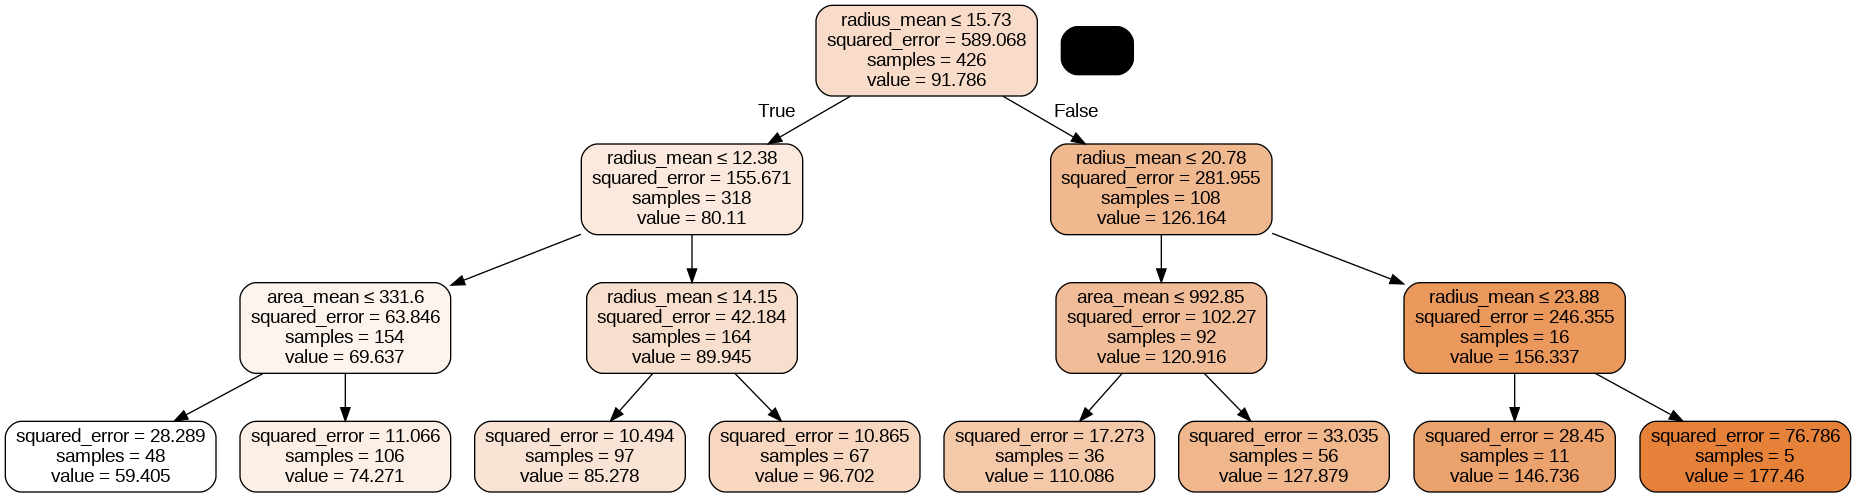

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Visualizar el árbol de regresión
dot_data = export_graphviz(arbol_regresion, out_file=None,
                           filled=True, rounded=True, special_characters=True,
                           feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Validación cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

# Crear el regresor del árbol de regresión con la profundidad máxima deseada
arbol_regresion = DecisionTreeRegressor(max_depth=3)

# Realizar validación cruzada
scores = cross_val_score(arbol_regresion, X_imputed, y, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores negativos a MSE positivos
mse_scores = -scores

# Calcular el promedio de los MSE
mean_mse = mse_scores.mean()

print("Promedio del Error cuadrado medio (MSE) en validación cruzada:", mean_mse)

Promedio del Error cuadrado medio (MSE) en validación cruzada: 22.274360767760694


# ¿Mejoran los resultados con la validación cruzada?